# Прогноз прироста розничных кредитов в зависимости от состояния экономики

Возьмем статистику по макро экономическим параметрам с сайта ЦБ. Оттуда же возьмем статистику по объему розничных кредитов и попробуем проанализировать полученные данные и построить простой прогноз

### Первым делом 

Загрузим библиотеки, в которых содержатся функции для операций с данными. Это **Numpy** и **Pandas**

In [1]:
import numpy as np
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Теперь

Загрузим библиотеки, c помощью которых можно строить различные графики и диаграммы

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузим данные

Загрузим наши данные из Excel файла и посмотрим, как они выглядят. 

In [3]:
xls_file = pd.ExcelFile('CBR volume for demonstration.xlsx', index_col='Date')
df = xls_file.parse('Total_short', index_col='Date')
df.head()

,Volume_total,Volume_ruble,Volume_currency,Exposure_total,3month_rate,Delta_GDP,Unemployment,Consumer_price_index,flag_December,RUBUSD
Date,,,,,,,,,,
2009-04-01,456779.2,424697.2,32082.0,3848399.0,16.53,-0.035002,8.3,100.7,0,33.9032
2009-05-01,228701.0,216410.3,12290.7,3791289.5,16.04,-0.035002,8.3,100.6,0,32.9740
2009-06-01,221268.3,212818.6,8449.7,3722873.1,12.49,-0.035002,8.3,100.6,0,30.9843
2009-07-01,266435.9,256395.6,10040.3,3683033.9,11.81,-0.065562,8.3,100.6,0,31.0385
2009-08-01,232492.2,221958.4,10533.8,3667260.9,11.89,-0.065562,8.3,100.0,0,31.1533


In [4]:
df.tail()

,Volume_total,Volume_ruble,Volume_currency,Exposure_total,3month_rate,Delta_GDP,Unemployment,Consumer_price_index,flag_December,RUBUSD
Date,,,,,,,,,,
2017-06-01,753791.0,746477.0,7313.0,11027955.0,9.45,0.007269,5.537196,100.6,0,56.6876
2017-07-01,764947.0,754035.0,10912.0,11151074.0,9.23,0.007269,5.537196,100.1,0,59.3862
2017-08-01,780537.0,771758.0,8778.0,11295168.0,9.21,0.007269,5.537196,99.5,0,60.0633
2017-09-01,817760.0,809645.0,8116.0,11477553.0,9.12,0.007269,5.537196,99.9,0,58.5454
2017-10-01,790554.0,782138.0,8416.0,11629176.0,8.69,0.007269,5.537196,100.2,0,58.4255


Здесь Volume - это объем новых выдач, а Exposure это объем задолженности во всех валютах, включая просроченную

In [81]:
df.index

DatetimeIndex(['2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01',
               '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01',
               '2009-12-01', '2010-01-01',
               ...
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01'],
              dtype='datetime64[ns]', name='Date', length=103, freq=None)

### Теперь создадим вспомогательные переменные

Для процентной ставки, безработицы и инфляции посчитаем приращения за каждый месяц

In [93]:
df['Delta_3month_rate'] =  df['3month_rate'].diff()
df['Delta_3month_rate'][0] = 0

In [94]:
df['Delta_unemployment'] =  df['Unemployment'].diff()
df['Delta_unemployment'][0] = 0

In [95]:
df['Delta_CPI'] =  df['Consumer_price_index'].diff()
df['Delta_CPI'][0] = 0

Посчитаем рост портфеля и приращения курса доллара в процентном соотношении

In [96]:
df['Delta_RUBUSD'] =  df['RUBUSD'].diff()/df['RUBUSD']
df['Delta_RUBUSD'][0] = 0

In [97]:
df['Portfolio_growth'] =  df['Exposure_total'].diff()/df['Exposure_total']
df['Portfolio_growth'][0] = 0

### Визуализация

Посмотрим на график объемов кредитов. Можно заметить, что у нас в конце года есть пики по объемам. Добавим соответствующую переменную

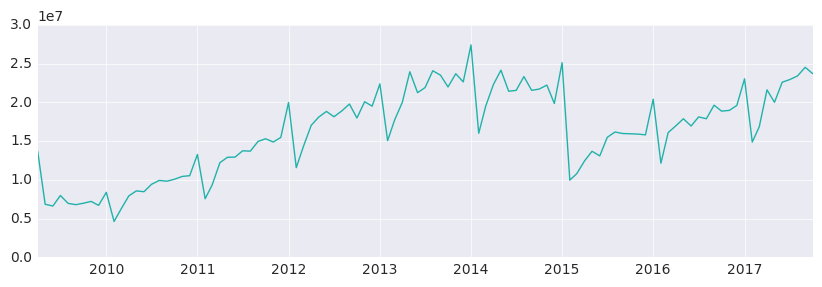

In [145]:
figsize(10, 3)
p = plt.plot(df['Volume_total']*30 ,c = 'lightseagreen')
#plt.xlim((0, 102))
plt.show()

In [91]:
df['flag_December'] = (df.index.month ==12)


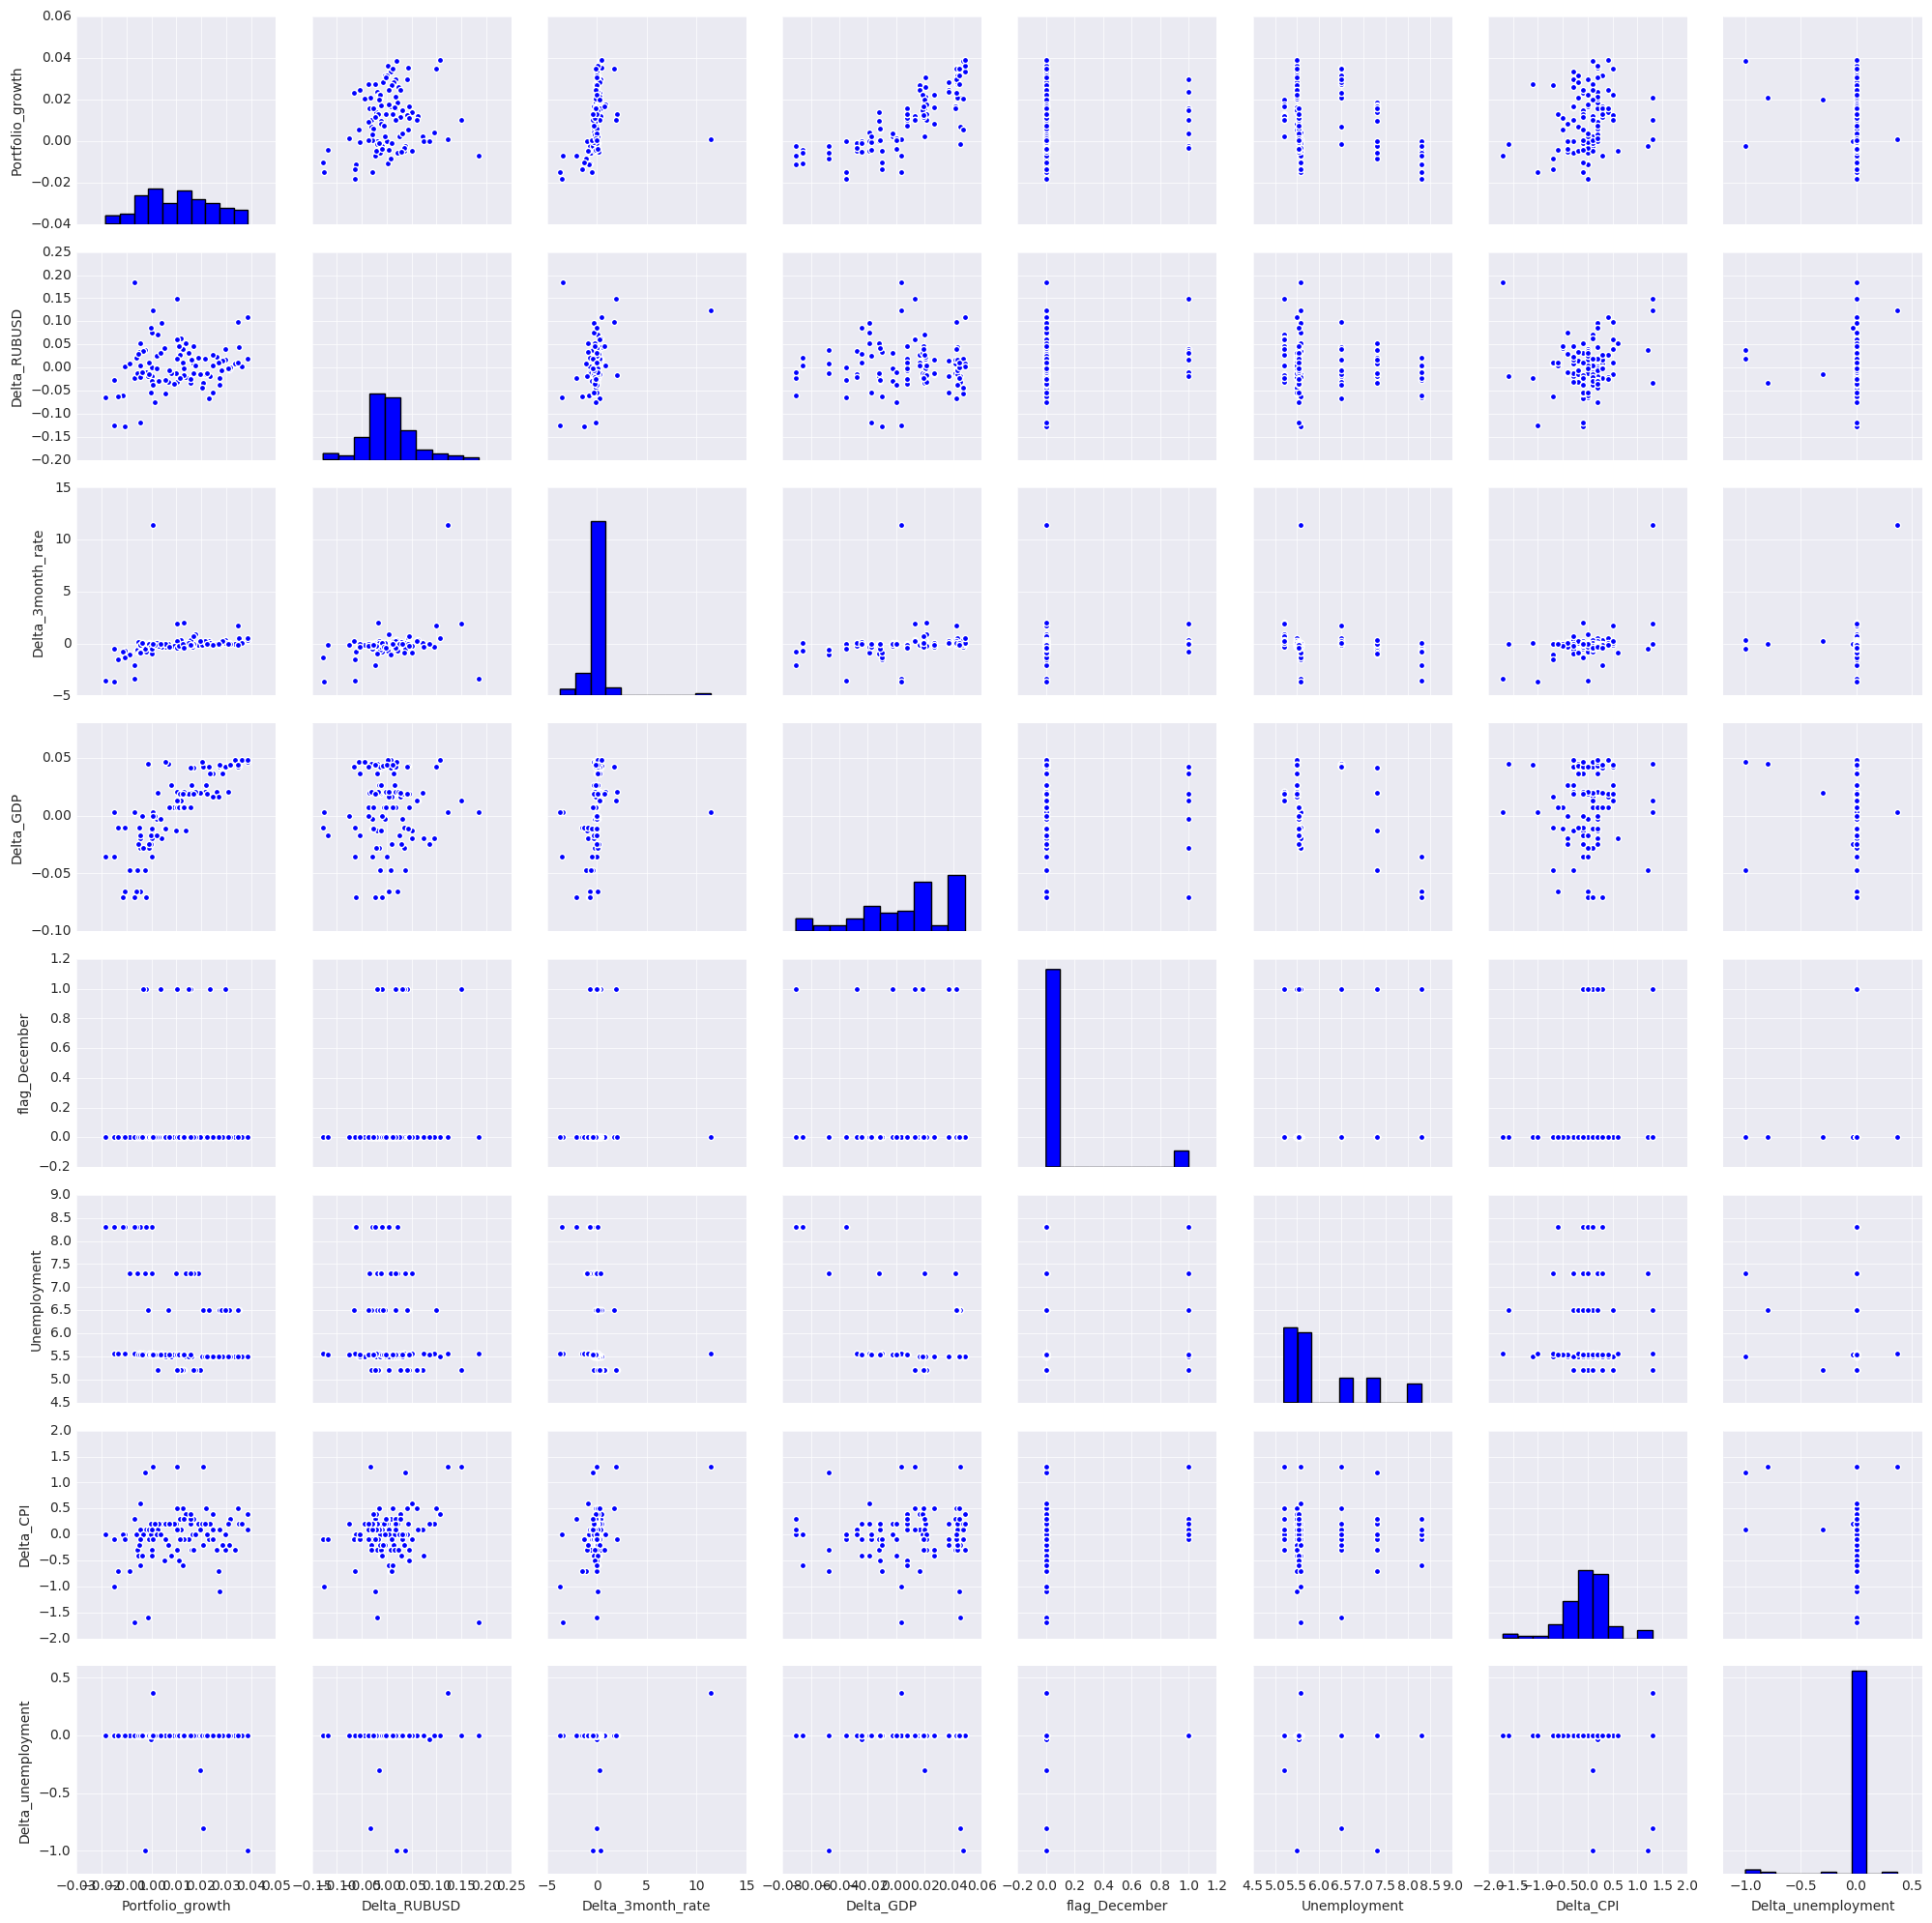

In [158]:
plt.style.use('seaborn-darkgrid')
sns.pairplot(
    df[['Portfolio_growth','Delta_RUBUSD','Delta_3month_rate','Delta_GDP','flag_December','Unemployment' ,'Delta_CPI','Delta_unemployment']],kind="scatter", palette="YlOrRd");

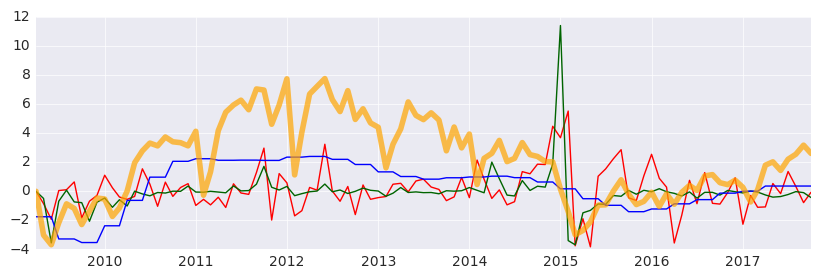

In [119]:
figsize(10, 3)
plt.style.use('seaborn-darkgrid')
plt.plot(df['Delta_RUBUSD']*30 ,c = 'red')
plt.plot(df['Delta_3month_rate'],c = 'darkgreen')
plt.plot(df['Delta_GDP']*50,c = 'blue')
plt.plot(df['Portfolio_growth']*200,c = 'Orange',linewidth=4, alpha=0.7)

plt.show()

In [104]:
predictors = list(set(['Delta_RUBUSD','Delta_3month_rate','Delta_GDP','Unemployment','flag_December','Delta_CPI']))

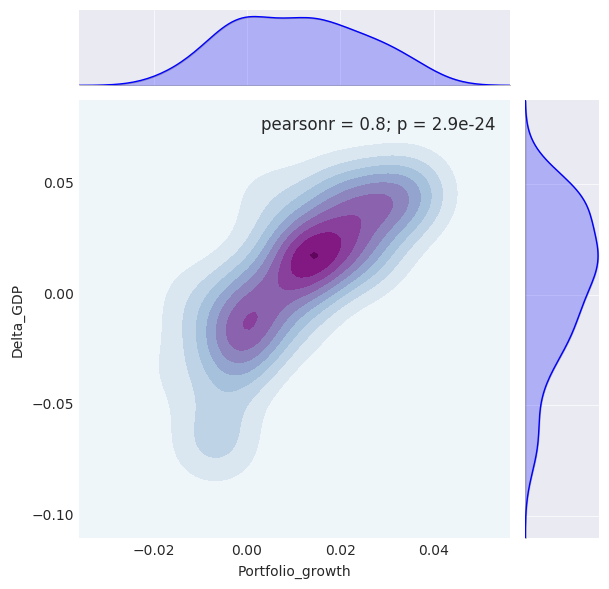

In [156]:
sns.jointplot(x='Portfolio_growth', y='Delta_GDP', 
              data=df, kind='kde',cmap = 'BuPu')

Смотрим на корреляции признаков

In [106]:
corr = df[predictors].corr()
corr

,Unemployment,Delta_3month_rate,flag_December,Delta_RUBUSD,Delta_CPI,Delta_GDP
Unemployment,1.000000,-0.194898,0.038185,-0.136452,-0.017277,-0.455573
Delta_3month_rate,-0.194898,1.000000,0.061294,0.340262,0.426735,0.216277
flag_December,0.038185,0.061294,1.000000,0.180296,0.143649,-0.005812
Delta_RUBUSD,-0.136452,0.340262,0.180296,1.000000,0.160066,0.044031
Delta_CPI,-0.017277,0.426735,0.143649,0.160066,1.000000,0.024816
Delta_GDP,-0.455573,0.216277,-0.005812,0.044031,0.024816,1.000000


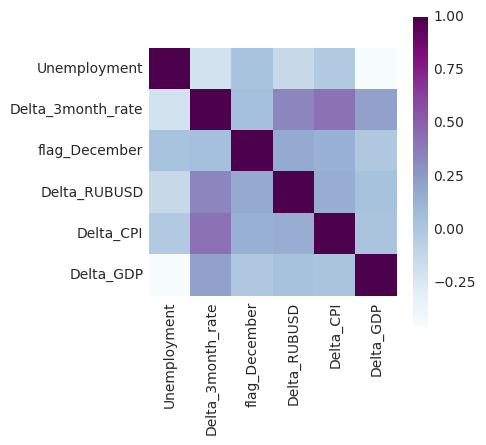

In [153]:
figsize(4, 4)
sns.heatmap(corr, cmap = "BuPu", square = True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11272470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0FB2BB50>]], dtype=object)

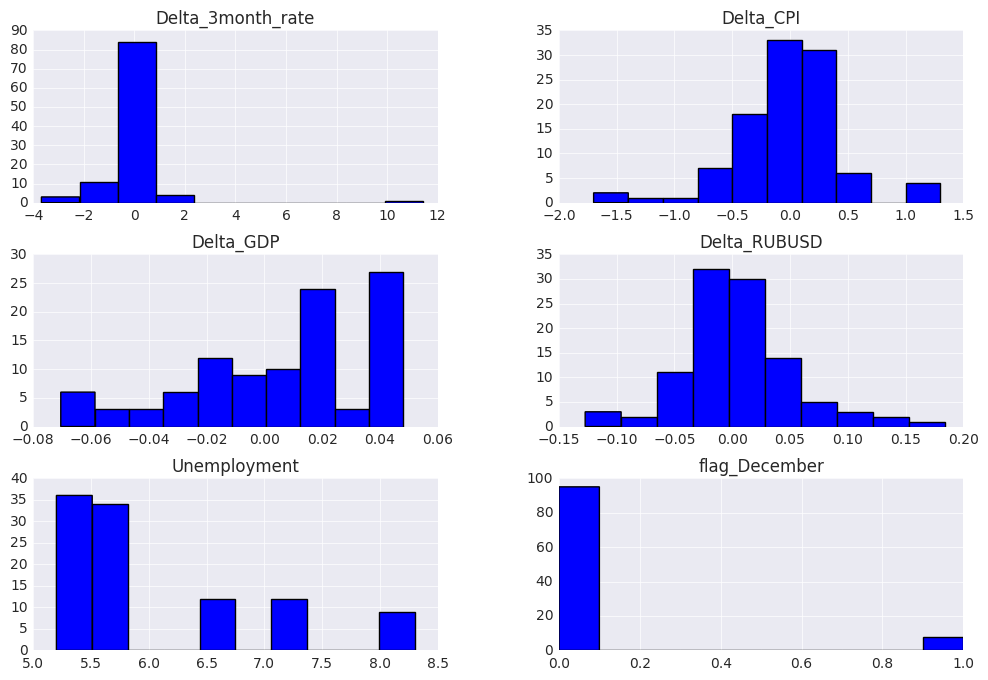

In [167]:
figsize(12, 8)
df[predictors].hist()

In [129]:
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics import classification_report,r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression, LassoCV, Lasso 

###### Разбиваем на обучающую и тестовую выборки

In [130]:
X_train,X_test,y_train,y_test =train_test_split(df[predictors]
                                                ,df['Portfolio_growth'],random_state=42)
X_total = df[predictors]
y_total = df['Portfolio_growth']

##### Случайный лес, важность признаков

In [131]:
forest = RandomForestRegressor(n_estimators=500, max_depth = 5,
                                random_state=42).fit(X_train, y_train)

features = pd.DataFrame(forest.feature_importances_,
                        index=X_train.columns,columns=['Importance']).sort_values(['Importance'], 
                                                     ascending=False)
test_pred = forest.predict(X_test)
features

,Importance
Delta_GDP,0.778450
Delta_3month_rate,0.106477
Delta_RUBUSD,0.071773
Unemployment,0.026010
Delta_CPI,0.016487
flag_December,0.000803


In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_tot_scaled = scaler.fit_transform(X_total)

In [161]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,Unemployment,Delta_3month_rate,flag_December,Delta_RUBUSD,Delta_CPI,Delta_GDP
0,1.314340,-0.128783,-0.290701,0.251261,-0.073293,0.438226
1,-0.508517,-0.770197,-0.290701,-2.604664,-0.308443,-0.500494
2,-0.579416,0.050813,-0.290701,-0.061796,0.632156,1.214001
3,1.314340,-0.224995,-0.290701,0.658264,2.748505,-1.678741
4,-0.540282,-0.019742,-0.290701,-2.430415,-0.308443,-0.723520


##### Регрессия

In [162]:
linregsc = LinearRegression(n_jobs=-1)
linreg = LinearRegression(n_jobs=-1)
linregsc.fit(X_train_scaled, y_train)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [163]:
print(mean_squared_error(linregsc.predict(X_train_scaled), y_train))
print(r2_score(y_train,linregsc.predict(X_train_scaled)))
print(r2_score(y_test,linregsc.predict(X_test_scaled)))

6.07921495251e-05
0.698013442705
0.65726231128


In [164]:
linreg_coef = pd.DataFrame(np.c_[linregsc.coef_, np.abs(linregsc.coef_)], index=df[predictors].columns, 
                           columns=['Coeff.', 'Coeff.abs'])
linreg_coef.sort_values(by='Coeff.abs', ascending=False)

,Coeff.,Coeff.abs
Delta_GDP,0.011943,0.011943
Delta_RUBUSD,0.002510,0.002510
Delta_CPI,0.002456,0.002456
Unemployment,0.001674,0.001674
Delta_3month_rate,-0.000707,0.000707
flag_December,0.000013,0.000013


##### Сравнение двух моделей

In [165]:
pred_total = linregsc.predict(X_tot_scaled)
pred_total_forest = forest.predict(X_total)

In [6]:
plt.plot(pred_total, label='linreg', c='lightgreen')
plt.plot(pred_total_forest, label='linreg', c='lightblue')
#plt.plot(y_total, label='Actual', c='red')

NameError: name 'pred_total' is not defined